In [34]:
import pandas as pd
from matplotlib import pyplot as plt

dataframes column'names are taken from the `README.md` file in the dataset

## characters

In [43]:
characters_df = pd.read_csv("MovieSummaries/character.metadata.tsv", delimiter="\t", header=None)
characters_df.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "Character name", "Actor date of birth", "Actor gender", "Actor height (in meters)", "Actor ethnicity (Freebase ID)", "Actor name", "Actor age at movie release", "Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"]

In [44]:
characters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450669 entries, 0 to 450668
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Wikipedia movie ID               450669 non-null  int64  
 1   Freebase movie ID                450669 non-null  object 
 2   Movie release date               440674 non-null  object 
 3   Character name                   192794 non-null  object 
 4   Actor date of birth              344524 non-null  object 
 5   Actor gender                     405060 non-null  object 
 6   Actor height (in meters)         154824 non-null  float64
 7   Actor ethnicity (Freebase ID)    106058 non-null  object 
 8   Actor name                       449441 non-null  object 
 9   Actor age at movie release       292556 non-null  float64
 10  Freebase character/actor map ID  450669 non-null  object 
 11  Freebase character ID            192804 non-null  object 
 12  Fr

In [45]:
characters_df.describe()

,Wikipedia movie ID,Actor height (in meters),Actor age at movie release
count,4.506690e+05,154824.000000,292556.000000
mean,1.396975e+07,1.788893,37.788523
std,1.079662e+07,4.379940,20.587870
min,3.300000e+02,0.610000,-7896.000000
25%,3.759292e+06,1.676400,28.000000
50%,1.189065e+07,1.750000,36.000000
75%,2.366501e+07,1.830000,47.000000
max,3.750192e+07,510.000000,103.000000


In [46]:
characters_df.sample(10)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
376714,8654526,/m/027cqf8,2006-10-28,Rhyann,NaN,F,NaN,NaN,Rhyann Crooks,NaN,/m/0jgq3gr,/m/0jgq3gv,/m/0jgq3h1
402293,25901276,/m/0b6f79y,1986-03-21,Harikrishnan,1951-09-07,M,1.78,/m/04mvp8,Mammootty,34.0,/m/0gbmgck,/m/0h27x8l,/m/02hkv5
168870,25588749,/m/09rx7j2,2006-02-13,Father Owen,1961-04-11,M,1.80,/m/0fj1k9,Vincent Gallo,44.0,/m/0csbxd1,/m/0h2y6w4,/m/01fxck
172054,12596488,/m/02wx605,1951-02-10,Yosemite Sam,1908-05-30,M,NaN,/m/041rx,Mel Blanc,42.0,/m/0hynsck,/m/01c5hx,/m/0c5vh
261338,27081302,/m/0bs4kxr,1949-04-19,NaN,1885-04-15,M,NaN,/m/03bkbh,Albert Sharpe,NaN,/m/0g9q6m1,NaN,/m/04gqmt7
215480,6947418,/m/0gycdr,1998-09-04,Lamboo Aata,NaN,M,NaN,NaN,Ishrat Ali,NaN,/m/0h87sy2,/m/0h87sy4,/m/0gbyqwr
320218,18501873,/m/04d_rn0,1967,Smitty,1951,NaN,NaN,NaN,Kay Reynolds,16.0,/m/0c1gp9t,/m/0c1gp9x,/m/05wd7zp
354107,25683211,/m/09v190b,1953-09-03,NaN,1907-07-10,M,NaN,NaN,Angelo Dessy,46.0,/m/0g9k66k,NaN,/m/0g9k66n
168104,33434044,/m/09pgd72,1930-07-11,Struthers,1891-07-19,M,NaN,NaN,William H. O'Brien,NaN,/m/0hz47xt,/m/0hz47xy,/m/0hz47y4
59621,21982668,/m/05n_mqq,1952-11-21,Gemma Vianello,1938-05-10,F,NaN,NaN,Marina Vlady,14.0,/m/0n589z6,/m/0n589z9,/m/032v6s


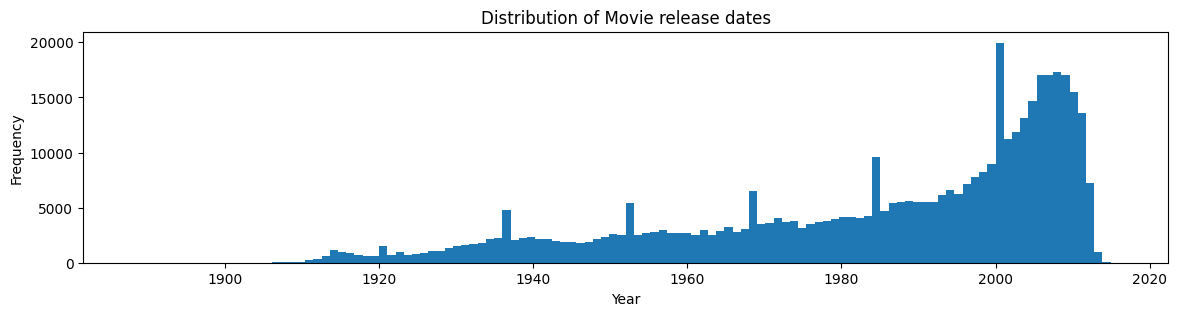

In [95]:
movie_dates = pd.to_datetime(characters_df['Movie release date'], errors='coerce').dt.year
plt.figure(figsize=(14,3))
plt.hist(movie_dates, bins=2020-1900)  
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Movie release dates')
plt.show()

<Axes: title={'center': 'Actor age at movie release'}, xlabel='Age', ylabel='Frequency'>

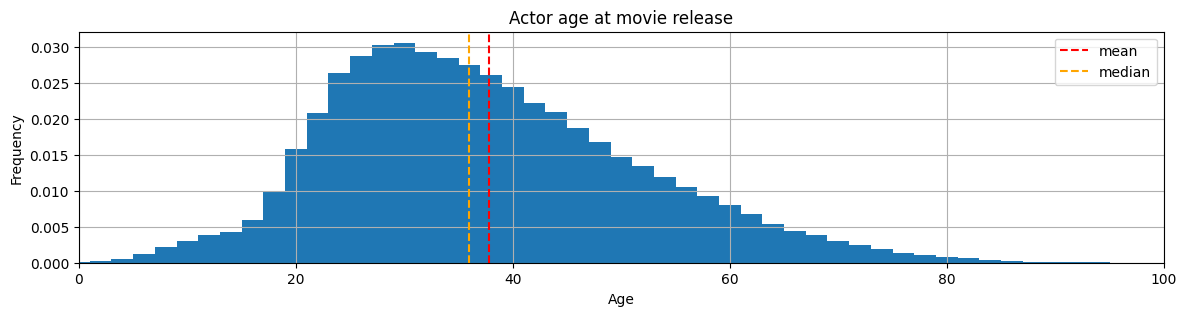

In [112]:
plt.figure(figsize=(14,3))
plt.title("Actor age at movie release")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0,100)
plt.axvline(characters_df["Actor age at movie release"].mean(), linestyle="--", color="red", label="mean")
plt.axvline(characters_df["Actor age at movie release"].median(), color="orange", label="median", linestyle="--")
plt.legend()
characters_df["Actor age at movie release"].hist(bins=4000, density=True)

In [49]:
"""
actor_dates = pd.to_datetime(characters_df['Actor date of birth'], errors='coerce').dt.year


plt.figure(figsize=(8,3))
plt.hist(actor_dates, bins=50)  
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Actor date of birth')
plt.show()
"""

"\nactor_dates = pd.to_datetime(characters_df['Actor date of birth'], errors='coerce').dt.year\n\n\nplt.figure(figsize=(8,3))\nplt.hist(actor_dates, bins=50)  \nplt.xlabel('Year')\nplt.ylabel('Frequency')\nplt.title('Distribution of Actor date of birth')\nplt.show()\n"

## movies

In [20]:
movies_df = pd.read_csv("MovieSummaries/movie.metadata.tsv", delimiter="\t", header=None)
movies_df.columns = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie box office revenue", "Movie runtime", "Movie languages (Freebase ID:name tuples)", "Movie countries (Freebase ID:name tuples)", "Movie genres (Freebase ID:name tuples)"]

In [21]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Wikipedia movie ID                         81741 non-null  int64  
 1   Freebase movie ID                          81741 non-null  object 
 2   Movie name                                 81741 non-null  object 
 3   Movie release date                         74839 non-null  object 
 4   Movie box office revenue                   8401 non-null   float64
 5   Movie runtime                              61291 non-null  float64
 6   Movie languages (Freebase ID:name tuples)  81741 non-null  object 
 7   Movie countries (Freebase ID:name tuples)  81741 non-null  object 
 8   Movie genres (Freebase ID:name tuples)     81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


In [23]:
movies_df.describe()

,Wikipedia movie ID,Movie box office revenue,Movie runtime
count,8.174100e+04,8.401000e+03,6.129100e+04
mean,1.740784e+07,4.799363e+07,1.118192e+02
std,1.098791e+07,1.121753e+08,4.360070e+03
min,3.300000e+02,1.000000e+04,0.000000e+00
25%,7.323695e+06,2.083193e+06,8.100000e+01
50%,1.777899e+07,1.063969e+07,9.300000e+01
75%,2.715573e+07,4.071696e+07,1.060000e+02
max,3.750192e+07,2.782275e+09,1.079281e+06


In [22]:
movies_df.sample(10)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
31322,18057739,/m/047msdk,(500) Days of Summer,2009-07-17,60722734.0,95.0,"{""/m/064_8sq"": ""French Language"", ""/m/06mp7"": ...","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0219x_"": ""..."
56044,23666746,/m/06zk4wy,L'uomo di Toledo,1965-08-27,NaN,96.0,"{""/m/02bjrlw"": ""Italian Language""}","{""/m/06mkj"": ""Spain"", ""/m/03rjj"": ""Italy"", ""/m...","{""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""..."
78336,13082491,/m/02z5vy7,Jaadugar,1989,NaN,173.0,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/01hmnh"": ""Fantasy"", ""/m/01z4y"": ""Comedy""}"
8513,24716095,/m/0806vdz,Guilty of Treason,1950-02-20,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/017fp"": ""Biography"", ""/m/07s9rl0"": ""Drama..."
81500,20806295,/m/054dgmk,Remember Last Night?,1935-10-28,NaN,81.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/01z4y"": ""Comedy"",..."
16415,23409260,/m/06wbgm7,Dancing In the Dark,1949,NaN,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical""}"
53917,3689613,/m/09vm2h,A Better Place,1997,NaN,85.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
4384,20635693,/m/0522h8c,Raising the Wind,NaN,NaN,NaN,{},"{""/m/07ssc"": ""United Kingdom""}","{""/m/01z4y"": ""Comedy""}"
64402,7434201,/m/0261jcr,Cat Got Your Luggage?,NaN,NaN,NaN,{},{},"{""/m/05p553"": ""Comedy film"", ""/m/0hcr"": ""Anima..."
21007,13987389,/m/03cq801,Mystery of Snow,2005-04-08,NaN,135.0,"{""/m/01xrrm"": ""Burmese Language""}","{""/m/04xn_"": ""Burma""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."


<Axes: xlabel='genre', ylabel='count'>

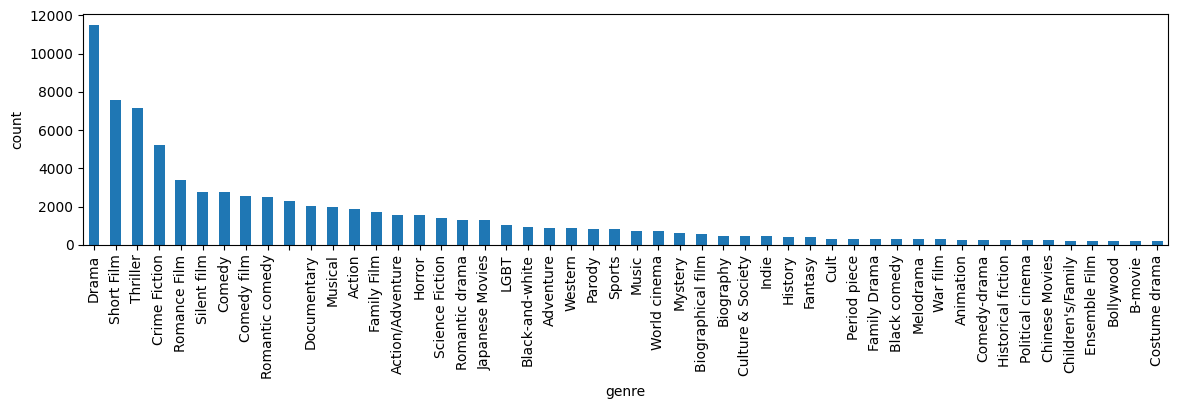

In [68]:
def get_genre(string):
    try:
        return string.split('"')[3]
    except:
        return ""

genres = movies_df["Movie genres (Freebase ID:name tuples)"].apply(get_genre).value_counts().head(50)
plt.figure(figsize=(14,3))
plt.xlabel("genre")
plt.ylabel("count")
genres.plot(kind="bar")

<Axes: xlabel='country', ylabel='count'>

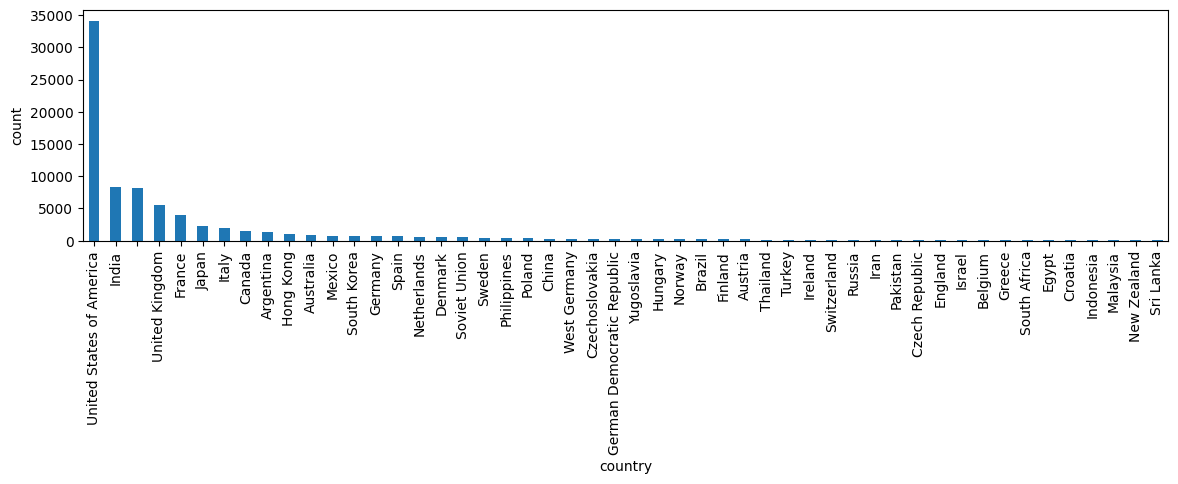

In [69]:
countries = movies_df["Movie countries (Freebase ID:name tuples)"].apply(get_genre).value_counts().head(50)
plt.figure(figsize=(14,3))
plt.xlabel("country")
plt.ylabel("count")
countries.plot(kind="bar")

<Axes: xlabel='language', ylabel='count'>

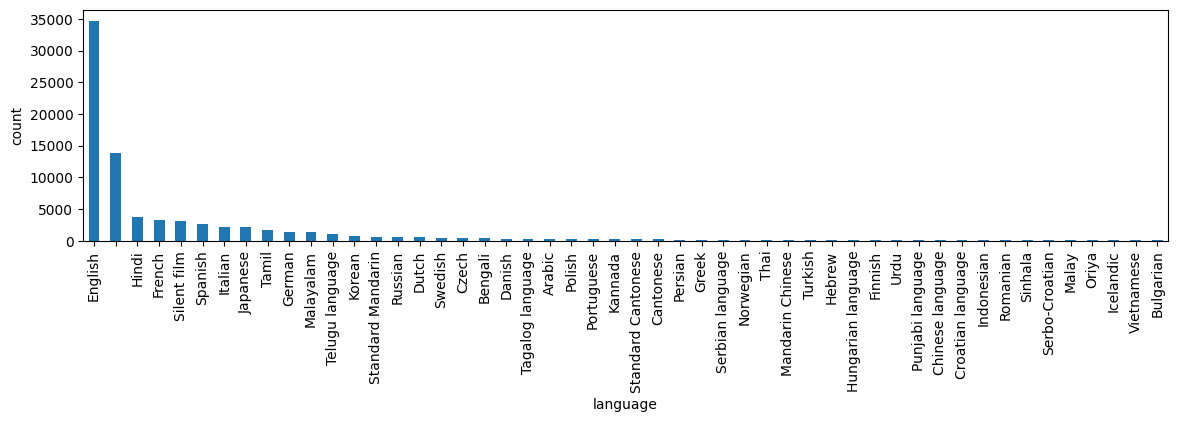

In [70]:
def get_language(string):
    try:
        return string.split('"')[3].replace("Language", "").strip()
    except:
        return ""

languages = movies_df["Movie languages (Freebase ID:name tuples)"].apply(get_language).value_counts().head(50)
plt.figure(figsize=(14,3))
plt.xlabel("language")
plt.ylabel("count")
languages.plot(kind="bar")

<Axes: title={'center': 'Movie box office revenue distribution'}, xlabel='Movie box office revenue', ylabel='frequency'>

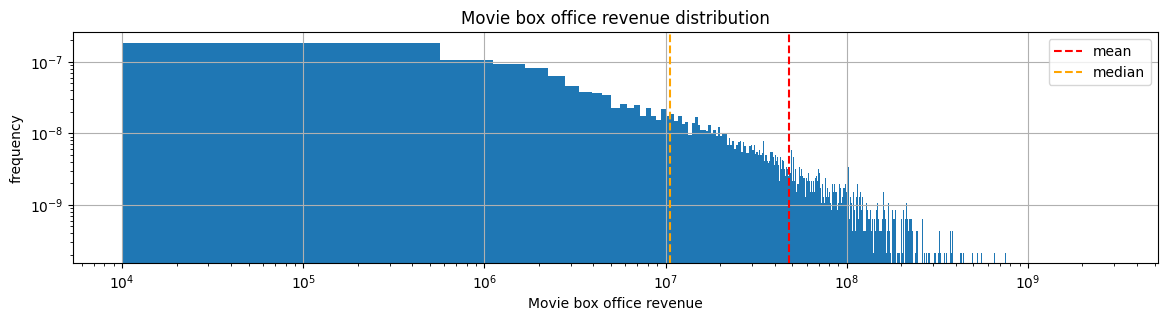

In [111]:
plt.figure(figsize=(14,3))
plt.title("Movie box office revenue distribution")
plt.xlabel("Movie box office revenue")
plt.ylabel("frequency")
#plt.xlim(0, 100000000)
plt.xscale("log")
plt.yscale("log")
plt.axvline(movies_df["Movie box office revenue"].mean(), color="red", label="mean", linestyle="--")
plt.axvline(movies_df["Movie box office revenue"].median(), color="orange", label="median", linestyle="--")
plt.legend()
movies_df["Movie box office revenue"].hist(density=True, bins=5000)